#**LAB-01 DE SIS421 - USO DE FRAMEWORKS**

Nombre: Gonzales Suyo Franz Reinaldo

C.U. 111-500

Contruya un mlp para clasificación de imagenes, utilizando un framework de terceros que no sea pytorch o keras, el dataset que utilizara sea el de plantas medicinales con las que se cuenten respaldadas hasta la fecha, se debe realizar una explicacion detallada de como funciona el framework elegido, como de los resultados obtenidos.

DIRECCIÓN DE GITHUB - LAB-01 FRAMEWORK GLUON
link de GitHub: https://github.com/Gonzales-Franz-Reinaldo/SIS421-IA2/tree/main/Laboratorios/LAB-01-Framework

##**FRAMEWORK - GLOUN**

En esta práctica Aplicaremos un Framework que casi no es muy conocido, pero puede ser aplicado en campo de inteligencia artifical ya sea para crear o diseñar una Red Neuronal.

Sin embargo el Framework que utilizaremos es el **GLUON** que es un framework que tiene al igual que otras frameworks, tiene funcion y librerias que se puden utilizar para crear una Red Neuronal. Por lo que en esta práctica aplicaremos este framework.

##Explicación del Framework Gluon

Gluon es una interfaz de alto nivel incluida en MXNet que permite la construcción y el entrenamiento de modelos de deep learning de manera más sencilla y rápida.

Con Gluon, puedes definir redes neuronales de manera dinámica, lo que facilita la experimentación. Proporciona una API de alto nivel que abstrae muchos detalles de implementación, permitiendo a los usuarios enfocarse en el diseño y entrenamiento de sus modelos.

###Un poco de Teoría del Framework Gluon

Gluon es una interfaz de alto nivel en MXNet que combina las ventajas de las interfaces estáticas y dinámicas. Permite construir modelos de manera intuitiva y dinámicamente, lo que facilita la depuración y la experimentación. Gluon proporciona componentes predefinidos para construir redes neuronales, funciones de pérdida y optimizadores, haciendo que el desarrollo de modelos sea más sencillo y eficiente.

###Algunas Ventajas de Gluon son:

- 1.**Flexibilidad**: Permite la definición dinámica de modelos, lo que facilita la experimentación y el ajuste de los mismos.

- 2.**Simplicidad**: Proporciona una API intuitiva que abstrae muchos detalles complejos, permitiendo a los usuarios enfocarse en el diseño del modelo.

- 3.**Rendimiento**: Aprovecha la eficiencia de MXNet, lo que permite construir y entrenar modelos de deep learning de manera rápida y eficiente.

##**PROCESAMIENTO DEL DATASET**

##Crear un CSV con las Rutas de las Imágenes y sus Etiquetas

In [ ]:
import os
import pandas as pd

In [ ]:
#Importamos los datos desde el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Definir el directorio base donde se encuentran las imágenes
base_dir = '/content/drive/MyDrive/SIS421-IA2/Laboratorios/LAB-01/Plantas_Medicinales'

In [ ]:
# Inicializar listas para almacenar las rutas de las imágenes y las etiquetas
image_paths = []
labels = []

# Recorrer todas las carpetas y archivos en el directorio base
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):
            # Obtener la ruta completa de la imagen
            file_path = os.path.join(root, file)
            # Obtener la etiqueta de la imagen (nombre de la carpeta)
            label = os.path.basename(os.path.dirname(file_path))
            # Añadir la ruta de la imagen y la etiqueta a las listas
            image_paths.append(file_path)
            labels.append(label)

In [ ]:
# Crear un DataFrame con las rutas de las imágenes y sus etiquetas
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Guardar el DataFrame en un archivo CSV
df.to_csv('/content/drive/MyDrive/SIS421-IA2/Laboratorios/LAB-01/plantas_medicinales.csv', index=False)

In [ ]:
# Importamos el dataset crado
df = pd.read_csv('/content/drive/MyDrive/SIS421-IA2/Laboratorios/LAB-01/plantas_medicinales.csv')

# Mostramos el dataset
df

,image_path,label
0,/content/drive/MyDrive/SIS421-IA2/Laboratorios...,Arjun Leaf
1,/content/drive/MyDrive/SIS421-IA2/Laboratorios...,Arjun Leaf
2,/content/drive/MyDrive/SIS421-IA2/Laboratorios...,Arjun Leaf
3,/content/drive/MyDrive/SIS421-IA2/Laboratorios...,Arjun Leaf
4,/content/drive/MyDrive/SIS421-IA2/Laboratorios...,Arjun Leaf
...,...,...
8127,/content/drive/MyDrive/SIS421-IA2/Laboratorios...,Curry Leaf
8128,/content/drive/MyDrive/SIS421-IA2/Laboratorios...,Curry Leaf
8129,/content/drive/MyDrive/SIS421-IA2/Laboratorios...,Curry Leaf
8130,/content/drive/MyDrive/SIS421-IA2/Laboratorios...,Curry Leaf


In [ ]:
# Mostrar las primeras filas del dataset
print(df.head())

                                          image_path       label
0  /content/drive/MyDrive/SIS421-IA2/Laboratorios...  Arjun Leaf
1  /content/drive/MyDrive/SIS421-IA2/Laboratorios...  Arjun Leaf
2  /content/drive/MyDrive/SIS421-IA2/Laboratorios...  Arjun Leaf
3  /content/drive/MyDrive/SIS421-IA2/Laboratorios...  Arjun Leaf
4  /content/drive/MyDrive/SIS421-IA2/Laboratorios...  Arjun Leaf


In [ ]:
# Mostrar el número de columnas
print("Número de columnas:", len(df.columns))

# Mostrar los nombres de las columnas
print("Nombres de las columnas:", df.columns)

# Mostrar las clases únicas en el df
clases_unicas = df['label'].unique()
print("Clases únicas:", clases_unicas)
print("Número de clases:", len(clases_unicas))


Número de columnas: 2
Nombres de las columnas: Index(['image_path', 'label'], dtype='object')
Clases únicas: ['Arjun Leaf' 'Mint Leaf' 'Marsh Pennywort Leaf' 'Neem Leaf' 'Rubble Leaf'
 'Curry Leaf']
Número de clases: 6


##Importamos las Librerias

In [ ]:
!pip install --upgrade mxnet
!pip install numpy==1.23.1

In [ ]:
import numpy as np
np.bool = np.bool_  # Reassign the deprecated alias

In [ ]:
import pandas as pd
import mxnet as mx
from mxnet import gluon, autograd, nd
from mxnet.gluon.data.vision import transforms
from mxnet.gluon.data import Dataset
from sklearn.model_selection import train_test_split
# import numpy as np

##1. Cargar y Preprocesar el Dataset para el Modelo

In [ ]:

# Definir la clase personalizada para cargar el dataset
class MedicinalPlantsDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        # Crear un diccionario para mapear las etiquetas de texto a enteros
        self.label_to_idx = {label: idx for idx, label in enumerate(self.data['label'].unique())}
        self.data['label'] = self.data['label'].map(self.label_to_idx)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        img = mx.image.imread(img_path)
        if self.transform:
            img = self.transform(img)
        return img, np.int32(label)

# Definir las transformaciones
transform_fn = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])




In [ ]:
# Cargar el dataset
dataset = MedicinalPlantsDataset('/content/drive/MyDrive/SIS421-IA2/Laboratorios/LAB-01/plantas_medicinales.csv', transform=transform_fn)

# # Verificar el dataset
# for i in range(len(dataset)):
#     img, label = dataset[i]

#     # Verificar las dimensiones de la imagen
#     if img.shape != (3, 128, 128):
#         print(f"Error en la imagen {i}: {img_path}")



In [ ]:
# Dividir en datos de entrenamiento y prueba usando sklearn
train_indices, test_indices = train_test_split(list(range(len(dataset))), test_size=0.2, random_state=42)

# Crear subconjuntos de entrenamiento y prueba
train_dataset = gluon.data.dataset.ArrayDataset(*zip(*[dataset[i] for i in train_indices]))
test_dataset = gluon.data.dataset.ArrayDataset(*zip(*[dataset[i] for i in test_indices]))

# Crear los iteradores de datos
train_loader = gluon.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = gluon.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

Dividimos los datos de entrenamiento y para la prueba para un formato que se pueda implementar.

 # **2: Definición del Modelo MLP**

In [ ]:
# Definicion del modelo

class MLP(gluon.nn.Block):
    def __init__(self, num_classes):
        super(MLP, self).__init__()

        # Definir las capas del modelo
        with self.name_scope():
            # Capa para aplanar la entrada 3D (imagen) en un vector 1D
            self.flatten = gluon.nn.Flatten()

            # Primera capa densa (fully connected) con 512 unidades y activación ReLU
            self.dense1 = gluon.nn.Dense(512, activation='relu')
            # Capa de dropout para prevenir el sobreajuste
            self.dropout1 = gluon.nn.Dropout(0.5)

            # Segunda capa densa con 256 unidades y activación ReLU
            self.dense2 = gluon.nn.Dense(256, activation='relu')
            # Otra capa de dropout
            self.dropout2 = gluon.nn.Dropout(0.5)

            # Capa de salida con un número de unidades igual al número de clases
            self.output = gluon.nn.Dense(num_classes)

    def forward(self, x):
        # Paso hacia adelante: pasar los datos a través de cada capa
        x = self.flatten(x)      # Aplanar la entrada
        x = self.dense1(x)       # Primera capa densa
        x = self.dropout1(x)     # Dropout
        x = self.dense2(x)       # Segunda capa densa
        x = self.dropout2(x)     # Dropout
        x = self.output(x)       # Capa de salida
        return x                 # Retorna la salida final del modelo



- Dentro de la clase conviertimos la entrada, que es una imagen 3D (altura, ancho, canales), en un vector 1D. Esto es necesario porque las capas densas en un MLP trabajan con vectores, no con imágenes 2D o 3D.

- Los dense1 y dense 2, Estas son capas densas, donde cada neurona está conectada a todas las neuronas de la capa anterior. relu se usa como función de activación, que introduce no linealidades al modelo y ayuda a aprender funciones más complejas.

- Los dropourt son capas apagan aleatoriamente un porcentaje de neuronas durante el entrenamiento, lo que ayuda a prevenir el sobreajuste al reducir la dependencia de ciertas características durante el aprendizaje.

- El Output esta es la capa final del modelo. El número de unidades (neuronas) es igual al número de clases que estás clasificando. La salida será un vector donde cada elemento representa la probabilidad de que la imagen pertenezca a una de las clases.

In [ ]:
# Determinar el número de clases
num_classes = len(dataset.data['label'].unique())


- Al determinar el número de clases en nuestro dataset, que es el número de categorías diferentes que las imágenes pueden representar. Este valor se usará para definir el número de neuronas en la capa de salida del MLP.

In [ ]:
# Instanciamos el modelo de nuestro MLP
net = MLP(num_classes)

# Inicializar los parámetros del modelo
net.initialize(mx.init.Xavier(), ctx=mx.cpu())

Inicializamos los parámetros en el modelo utilizando el método de inicialización Xavier. esto nos ayuda a mantener la escala de los gradientes durante el entrenamiento.

Ademas el mx.cpu nos indica que el modelo entrenará en la CPU, ya que no contamos con algunos recursos buenos.

##3: Definición del Loss y el Optimizer

Definimos la función de pérdida (loss) y el optimizador que usaremos para entrenar el modelo.

In [ ]:
# Definir la función de pérdida y el optimizador
learning_rate = 0.001  # Tasa de aprendizaje

# Definir la función de pérdida y el optimizador
loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': learning_rate})

- SoftmaxCrossEntropyLoss: Es una función de pérdida comúnmente utilizada para tareas de clasificación. Calcula la entropía cruzada entre las predicciones (después de aplicar softmax) y las etiquetas verdaderas.

- La funcion de gluon.Trainer: Este es el optimizador que actualizará los pesos del modelo en base a los gradientes calculados. Aquí se usa el optimizador adam, que es una versión avanzada del descenso de gradiente.

- Ademas establecemos el valor para la tasa de aprendizaje que es de 0.001.

##4: Entrenamiento del Modelo

In [ ]:
# Entrenamiento del modelo

epocas = 10  # Número de épocas de entrenamiento

for epoch in range(epocas):

    train_loss = 0.0  # Inicializar la pérdida de entrenamiento en 0
    # Se itera sobre los lotes de datos en el train_loader. train_loader divide los datos en pequeños lotes,
    # lo que permite entrenar en partes más pequeñas y controlar la memoria utilizada.
    for data, label in train_loader:
        # Pasamos los datos y las etiquetas a la CPU
        data = data.as_in_context(mx.cpu())
        label = label.as_in_context(mx.cpu())
        # Calculamos los gradientes
        with autograd.record():
            output = net(data)
            # Calculamos la pérdida comparando las predicciones con las etiquetas reales.
            loss = loss_fn(output, label)
        loss.backward()  # Calculamos los gradientes
        trainer.step(data.shape[0])
        # Calculammos la pérdida total para calcular la pérdida promedio por época.
        train_loss += loss.mean().asscalar()

    # Imprimir la pérdida promedio por época
    print(f"Epoca [{epoch+1}/{epocas}], Loss: {train_loss/len(train_loader):.4f}")


Epoca [1/10], Loss: 6.6682
Epoca [2/10], Loss: 1.6599
Epoca [3/10], Loss: 1.6285
Epoca [4/10], Loss: 1.6780
Epoca [5/10], Loss: 1.6623
Epoca [6/10], Loss: 1.6106
Epoca [7/10], Loss: 1.6326
Epoca [8/10], Loss: 1.6094
Epoca [9/10], Loss: 1.5745
Epoca [10/10], Loss: 1.5324


##5: Evaluación del Modelo

In [ ]:
# Evaluación del modelo

# Utilizamos la métrica de precisión para evaluar el rendimiento del modelo en el conjunto de prueba.
metric = mx.metric.Accuracy()

# Itera sobre los datos de prueba en el test_loader.
for data, label in test_loader:
    data = data.as_in_context(mx.cpu())
    label = label.as_in_context(mx.cpu())
    # Realizamos predicciones en los datos de prueba
    output = net(data)
    #  Se obtiene la clase predicha para cada imagen (la clase con la mayor probabilidad).
    predictions = nd.argmax(output, axis=1)
    # Actualizamos la métrica con las predicciones y las etiquetas reales.
    metric.update(labels=label, preds=predictions)

# Imprimimos la precisión del modelo en el conjunto de prueba.
print(f"Test Accuracy: {metric.get()[1]*100:.2f}%")

Test Accuracy: 47.57%


Haciendo pruebas con imagens seleccionadas de manera aleatoria de los datos de prueba para predecir a que clases de imagenes pertencen o se predicen.

##Realizando algunas pruebas con algunas imagenes

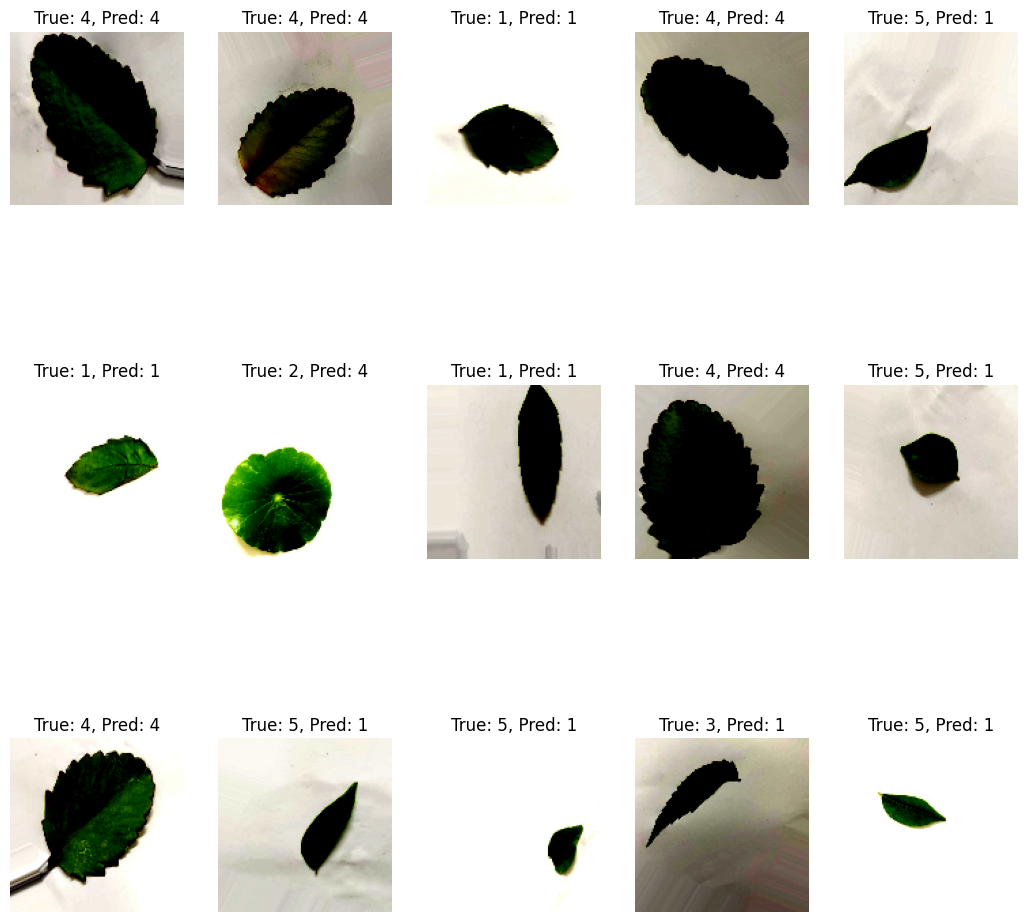

In [ ]:
import random
import matplotlib.pyplot as plt

# Seleccionar 15 imágenes aleatorias del conjunto de prueba
random_indices = random.sample(range(len(test_dataset)), 15)

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(13, 13))

for i, idx in enumerate(random_indices):
    # Obtener los datos de la imagen y la etiqueta real
    data, true_label = test_dataset[idx]

    # Mover los datos al contexto de la CPU
    data = data.as_in_context(mx.cpu())
    true_label = int(true_label)  # Convertir directamente a entero

    # Realizar la predicción
    output = net(data.expand_dims(axis=0))  # Expandir dimensiones para que sea batch de tamaño 1
    predicted_label = int(nd.argmax(output, axis=1).asscalar())

    # Mostrar la imagen con su predicción
    plt.subplot(3, 5, i+1)  # Mostrar 5 filas y 2 columnas
    plt.imshow(data.transpose((1, 2, 0)).asnumpy())  # Transponer las dimensiones para mostrarlas correctamente
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')

# Mostrar todas las imágenes
plt.show()


Como podemos verificar, seleccionamos 15 imagenes aleatorias de los datos de prueba y podemos visualizar las predicciones de las imagenes donde se muestran a que clase pertenencen y la predicción que se obtuvo a partir del modelo MLP.

#**Explicación Detallada del Uso del Framework**

Ahora una vez implementado el Framework explicaremos de como se implementó y como es que funciona este Framewook.

##¿Qué es Gluon?

Gluon es un framework de deep learning que fue desarrollado por Apache MXNet y Amazon Web Services (AWS), diseñado para ser flexible, eficiente y fácil de usar. Gluon permite construir, entrenar y probar redes neuronales de manera dinámica, lo que facilita la experimentación y el ajuste de modelos en comparación con otros frameworks de deep learning que requieren definir toda la estructura de la red antes de la ejecución.


##Principales Características de Gluon

- **Flexibilidad y Facilidad de Uso**: Gluon ofrece una API intuitiva que permite a los desarrolladores crear modelos de deep learning de manera sencilla utilizando Python. La capacidad de definir redes neuronales de forma imperativa, como si fuera un simple código Python, permite a los investigadores y desarrolladores iterar rápidamente en el desarrollo de modelos.

- **Definición Dinámica de Redes**: A diferencia de otros frameworks, Gluon no requiere que las redes sean definidas por completo antes de ser ejecutadas. Esto permite modificar y depurar el modelo durante el entrenamiento, lo cual es muy útil para la experimentación.

- **Capacidad de Entrenamiento con Alto Rendimiento**: Aunque Gluon es fácil de usar, también está optimizado para ofrecer un rendimiento de alto nivel en entrenamientos a gran escala. Utiliza técnicas de optimización como la computación automática de gradientes (autograd) y es compatible con GPUs, lo que permite entrenar modelos de manera eficiente.

## Ventajas y Desventajas de Gluon

###Ventajas:

- Simplicidad y Claridad: La API de Gluon es intuitiva y se siente como una extensión natural de Python.

- Flexibilidad Dinámica: La definición dinámica de redes neuronales permite mayor flexibilidad y facilidad para probar diferentes arquitecturas.

- Compatibilidad con MXNet: Gluon se integra estrechamente con MXNet, aprovechando su eficiencia y soporte para diferentes dispositivos de hardware.

###Desventajas:

- Menor Popularidad: Comparado con frameworks como TensorFlow o PyTorch, Gluon tiene una menor comunidad de usuarios, lo que puede traducirse en menos recursos disponibles.

- Dependencia de MXNet: Aunque MXNet es un potente motor de deep learning, algunos usuarios prefieren la mayor modularidad y ecosistema de PyTorch o TensorFlow.

##**Conclusión**

Gluon es un framework poderoso y fácil de usar para desarrollar modelos de deep learning. Su enfoque en la simplicidad y la flexibilidad lo hace ideal para aquellos que buscan experimentar rápidamente con diferentes arquitecturas de redes neuronales. A través de la implementación de un MLP para la clasificación de imágenes de plantas medicinales, se ha podido ver cómo Gluon facilita cada paso del desarrollo y entrenamiento del modelo, desde la definición del mismo hasta la evaluación de su rendimiento.








